Analisando preço de uma ação



In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
from datetime import date
import time
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


In [2]:
import plotly
import plotly.offline as py
from plotly.offline import plot, iplot
import plotly.io as pio
plotly.offline.init_notebook_mode(connected=True)
pio.renderers
pio.renderers.default ='colab'
import plotly.graph_objects as go

Obtendo dados do mercado

In [3]:
data_atual = date.today()
ibov = web.get_data_yahoo('ITUB3.SA', start= '2020-03-01', end=data_atual)
df = pd.DataFrame(data = ibov)
df.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.shape

(226, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,28.690001,29.040001,28.180000,28.600000,28.231569,1495100
1,2020-03-03,28.860001,28.860001,27.920000,28.309999,27.945305,1841400
2,2020-03-04,28.540001,28.719999,27.889999,28.600000,28.231569,1584500
3,2020-03-05,28.490000,28.490000,27.459999,28.120001,27.757753,1473300
4,2020-03-06,27.500000,28.000000,26.860001,27.209999,26.859478,2728600


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02
mean,24.222655,24.601018,23.757035,24.143717,23.948568,9.710053e+05
std,2.257224,2.232335,2.289110,2.293834,2.322332,1.029592e+06
min,20.580000,20.940001,19.459999,19.700001,19.446222,2.633000e+05
25%,22.307499,22.730000,21.762500,22.200001,21.967082,4.934750e+05
50%,23.815001,24.380000,23.380000,23.775001,23.571216,7.158500e+05
75%,25.947501,26.292500,25.420000,25.882500,25.708105,1.076700e+06
max,29.049999,29.379999,28.549999,28.900000,28.844585,1.208200e+07


In [7]:
trace = go.Candlestick(x=df['Date'].values,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
data = [trace]
py.iplot(data,filename ='simple_candlesick')

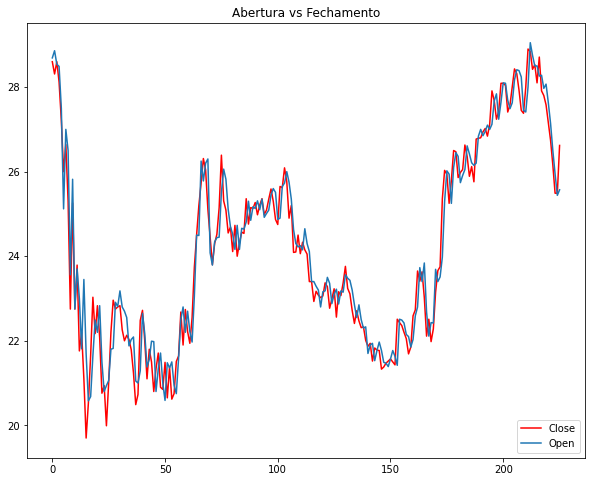

In [8]:
df['Close'].plot(figsize=(10,8), color='red');
df['Open'].plot(figsize=(10,8));
plt.title('Abertura vs Fechamento');
plt.legend();

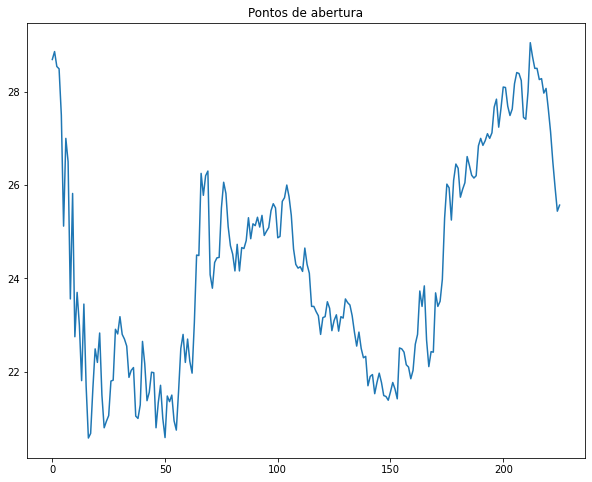

In [9]:
df['Open'].plot(figsize=(10,8));
plt.title('Pontos de abertura');

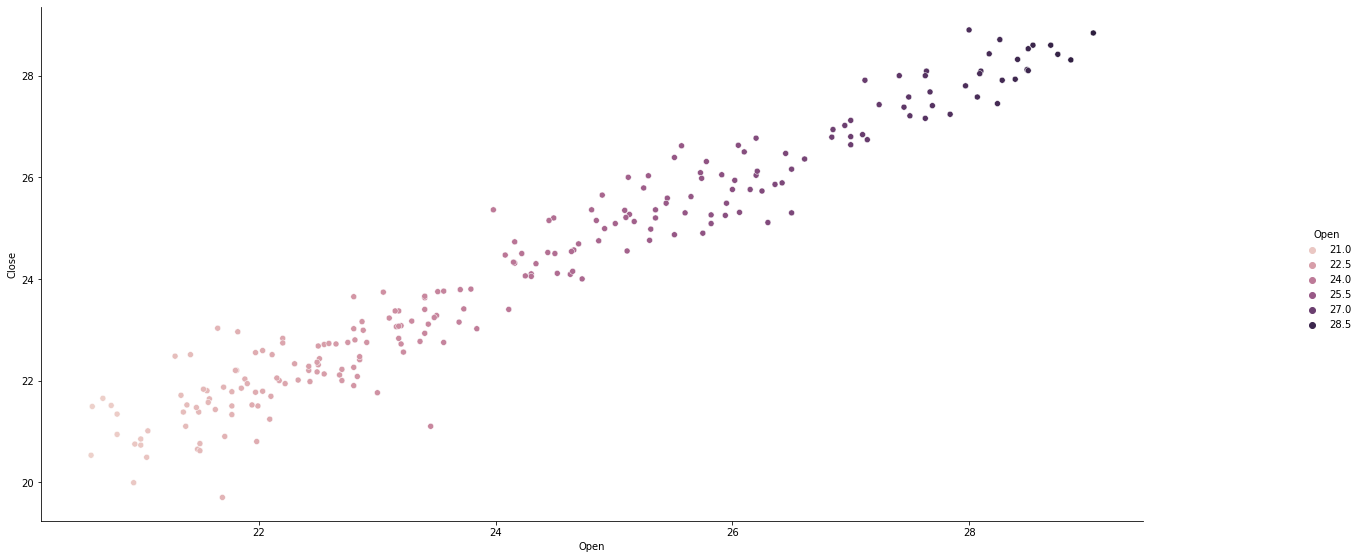

In [10]:
Graf = sns.relplot(x='Open', y='Close', data=df, hue='Open');
Graf.fig.set_size_inches(20,8)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

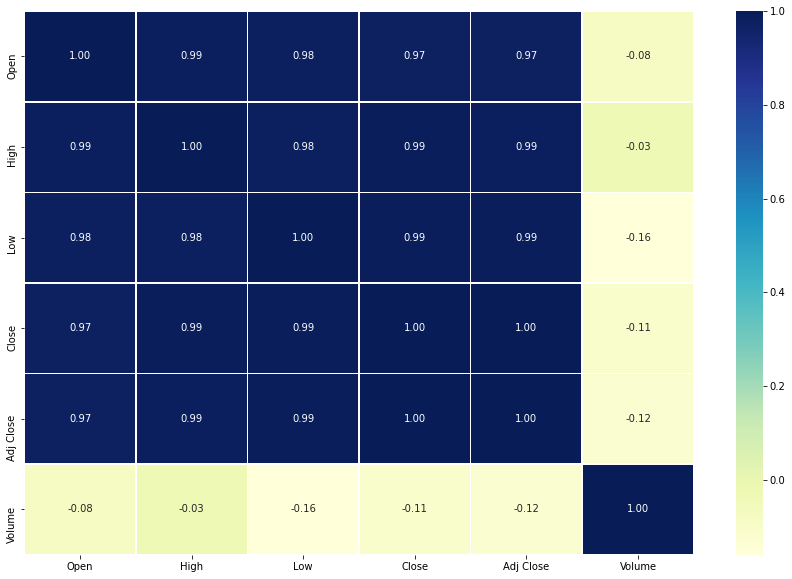

In [12]:
#Correlação entre váriaveis
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

In [13]:
X = np.array(df.drop(['Close','Date'],axis=1))
y = np.array(df["Close"])
X

array([[2.86900005e+01, 2.90400009e+01, 2.81800003e+01, 2.82315693e+01,
        1.49510000e+06],
       [2.88600006e+01, 2.88600006e+01, 2.79200001e+01, 2.79453049e+01,
        1.84140000e+06],
       [2.85400009e+01, 2.87199993e+01, 2.78899994e+01, 2.82315693e+01,
        1.58450000e+06],
       ...,
       [2.59500008e+01, 2.65499992e+01, 2.53400002e+01, 2.54899998e+01,
        8.95400000e+05],
       [2.54400005e+01, 2.59200001e+01, 2.51800003e+01, 2.54899998e+01,
        5.82000000e+05],
       [2.55699997e+01, 2.67399998e+01, 2.55300007e+01, 2.66200008e+01,
        3.67200000e+05]])

In [14]:
#Separando dados de treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [15]:
#Treinando o modelo
reg = LinearRegression().fit(X_train,y_train)

In [16]:
reg.score(X_test,y_test)

0.9987116448950754

In [17]:
reg.coef_

array([ 3.90357537e-03,  5.57596833e-02, -3.48640591e-02,  9.64519502e-01,
        7.42826983e-09])

In [18]:
reg.predict([[20, 20, 20, 20, 10]])

array([20.18316452])